Санкт-Петербургский Государственный Политехнический Университет   
## Дисциплина: Вычислительная математика   
# **Курсовая работа**

## Введение
### Постановка задачи:
![Формулировка задания](./meta/1.png)

## Теоретический материал
1.	**Решение системы уравнений с R, R2, E2.**  Функция linalg.lu_factor выполняет LU-разложение матрицы A (DECOMP). A = PLU. Функция возвращает матрицу lu, содержащую L и U в компактном виде (элементы ниже диагонали – L (единицы на диагонали подразумеваются), элементы на диагонали и выше – U), piv – вектор перестановок.
linalg.lu_solve((lu, piv), b) решает систему уравнений Ax = b (SOLVE) в два этапа: прямой и обратный ход, после чего возвращает вектор решения x.
2.	**Вычисление индуктивности L.** Вычисляется интеграл от функции x*log10(x) на интервале [1,2] с помощью функции quad (QUANC8). Результат умножается на коэффициент.
3.	**Вычисление значения ЭДС E1.** Сначала вычисляем ненулевой положительный корень уравнения e-x – (x – 1)2 = 0; корень ищем в промежутке [1,2], т.к.
f(1) = e-1 – (1 – 1)2 = e-1 = 0,3679… > 0
f(2) = e-2 – (2 – 1)2 = e-2 – 1 = - 0,8647… < 0
Ищем корень с помощью метода Брента brentq, аналогичной реализации функции ZEROIN. Корень умножается на коэффициент.
4.	**Вычисление начальных значений.** I1= E1 / R1; I3_0 = 0; Uc = -1 * E2. Также изменение начального значения Uc для повторного решения системы дифференциальных уравнений, с целью оценки влияния на точность погрешности исходных данных:  Uc_new = Uc * 1.01
5.	**Решение системы дифференциальных уравнений методом RK45 (RKF45).**


## Результаты работы программы

Шаг 1: Вычисление R, R_2, E_2
R = R1 = R3 = 40.000000 Ом
R2 = 20.000000 Ом
E2 = 1.000000 В

Шаг 2: Вычисление L
Интеграл: 0.276339, Погрешность интеграла: 3.07e-15
L = L1 = L3 = 0.040000 Гн

Шаг 3: Вычисление E_1
x* = 1.477670
E1 = 4.000000 В
Проверка: f(x*) = 8.33e-17

Шаг 4: Параметры цепи и начальные условия
C = 1.00e-06 Ф
Используемые параметры:
R1 = 40.000000 Ом, R2 = 20.000000 Ом, R3 = 40.000000 Ом
L1 = 0.040000 Гн, L3 = 0.040000 Гн
E1 = 4.000000 В, E2 = 1.000000 В
Начальные условия (основной): i1(0) = 0.100000 А, i3(0) = 0.000000 А, Uc(0) = -1.000000 В
Начальные условия (второй случай): i1(0) = 0.100000 А, i3(0) = 0.000000 А, Uc(0) = -1.010000 В

Шаг 5: Решение системы дифференциальных уравнений

Шаг 6: Построение графиков


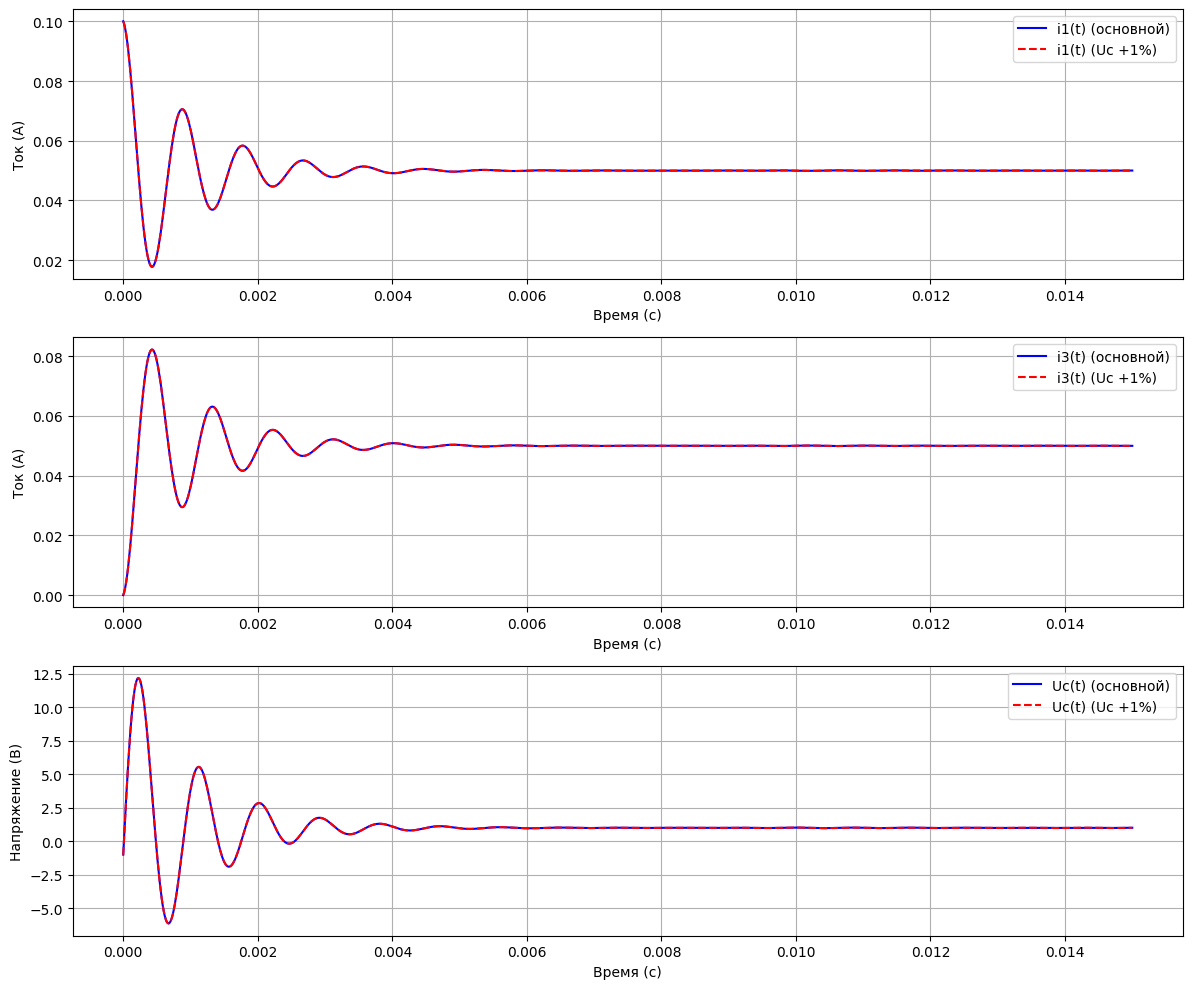


Шаг 7: Оценка погрешности (основной расчёт)
Максимальная погрешность i1: 7.99e-05 А
Максимальная погрешность i3: 7.99e-05 А
Максимальная погрешность Uc: 2.12e-02 В

Шаг 8: Таблица значений для ключевых точек времени
t (с)      i1 (А)          i1_new (А)      i3 (А)          i3_new (А)      Uc (В)          Uc_new (В)     
0.000      0.100000        0.100000        0.000000        0.000000        -1.000000       -1.010000      
0.002      0.050319        0.050323        0.049681        0.049677        2.848564        2.848309       
0.004      0.049121        0.049121        0.050879        0.050879        1.083152        1.083328       
0.006      0.049971        0.049971        0.050029        0.050029        0.967928        0.967924       
0.008      0.050025        0.050025        0.049975        0.049975        0.999682        0.999678       
0.010      0.049976        0.049981        0.050024        0.050019        1.019525        1.022047       
0.012      0.049974        0.04998

In [6]:
%run main.py

1.	**График i1(t).** Начинается с i1(0) = 0.1 А, резко падает ниже 0.02 А, колеблется и стабилизируется около 0.05 А. Поведение i1(t) соответствует переходному процессу в цепи с индуктивностью: резкий спад связан с размыканием ключа, колебания — с взаимодействием L, C и R. 
2.	**График i3(t).** Начинается с i3(0) = 0 А, резко возрастает выше 0.08 А, колеблется и стабилизируется около 0.05 А. Поведение i3(t) также типично для переходного про-цесса.

3.	**График Uc(t).** Начинается с Uc(0) = −1 В, резко возрастает до 12,5 В, колеблется и стабилизируется около 1 В. Резкий скачок напряжения связан с размыканием ключа и перераспределением зарядов, а колебания — с резонансом между L и C. 

4.	**Вторичные графики для оценки влияния начальных условий на погрешность результатов.** Графики совпадают с первичными, что означает что погрешность слишком мала, чтобы оценить ее графически.


## Выводы по работе:
Целью работы было моделирование переходного процесса в заданной электрической цепи после размыкания ключа в момент t = 0 и оценка погрешности решения.  
Графики i1(t), i3(t), Uc(t) показывают типичное поведение переходного процесса в RLC-цепи: резкие изменения в первые 2 мс, затем затухающие колебания и стабилизация.  
Погрешности для i1 и i3 (≈8×10−5 А) очень малы, что говорит о высокой точности.  
Погрешность для Uc (≈0.0212 В) больше, но приемлема, учитывая жёсткость системы из-за малой ёмкости C.  
Графически оценить влияние исходных данных на решение системы дифференциальных уравнений невозможно (без должного масштаба), но можно сделать выводы из таблицы.  
Изменение Uc(0) на 1% (с −1.00 В до −1.01 В) оказывает минимальное влияние на токи i1 и i3, что видно на графиках (кривые почти сливаются) и в таблице (разница на уровне 10-5 А). Они демонстрируют низкую чувствительность к изменению напряжения на конденсаторе, что логично, ведь их динамика определяется в основном индуктивностями и сопротивлениями.   
На Uc(t) влияние более заметно (разница до 0.007В), но всё ещё мала, что говорит о том, что система устойчива к небольшим изменениям начального условия.
Полученные результаты демонстрируют важность точного выбора начальных параметров и коэффициентов в моделях, а также подтверждают правильность реализации алгоритмов и точности вычислений.  
## Литература:
1. С.М.Устинов, В.А.Зимницкий. Вычислительная математика. – СПб.: БХВ-Петербург, 2009. – 336с. – (Учебное пособие.)  
2. Форсайт Дж., Малькольм М., Моулер К. Машинные методы математических вычислений. – М.: Мир, 1980. –  280с.
